# Proyecto Final

# Telecomunicaciones: identificar operadores ineficaces

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. 

Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

**Link de acceso a la presentación final del proyecto:**

https://docs.google.com/presentation/d/10es2XvIxAMhJki0Zh1M9CDg4Hoh1W3l9UMdkfeTz7EQ/edit?usp=sharing

**Link de acceso al documento Tableau del proyecto**

https://public.tableau.com/app/profile/gabriela.rivera6016/viz/Rendimientodeoperadores/Dashboard1?publish=yes

# Descripción de los datos

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. 

Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. 

Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

 

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

# Descarga de los datos

In [1]:
#cargar las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
#cargar los archivos del primer data
data= pd.read_csv("/datasets/telecom_dataset_us.csv")
clients= pd.read_csv("/datasets/telecom_clients_us.csv")

In [3]:
#manda a llamar info para conocer el tipo de datos que tenemos y analizar si debemos cambiar el tipo de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [4]:
data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


A primer vistazo rápido podemos observar valores ausentes en algunas de las columnas y conociendo los datos obtenidos, saber que nuestra columna de fecha no cuenta con el tipo de dato correcto, teniendo que ser corregido para su debido uso.

Es necesario un análisis más profundo para corroborar el estado del data,  garantizar se encuentre en las mejores condiciones para su uso y análisis. El cual se hará en la siguiente sección.

In [5]:
#manda a llamar info para conocer el tipo de datos que tenemos y analizar si debemos cambiar el tipo de datos
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [6]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


A primer vistazo rápido podemos observar que no existen valores ausentes en algunas de las columnas y conociendo los datos obtenidos, saber que nuestra columna de date_start no cuenta con el tipo de dato correcto, teniendo que ser corregido para su debido uso.

Es necesario un análisis más profundo para corroborar el estado del data,  garantizar se encuentre en las mejores condiciones para su uso y análisis. El cual se hará en la siguiente sección.

# Análisis exploratorio de datos Data

Para esta sección buscaremos la limpiea, corrección y mejora de ambos datas con el objetivo de otener la inormación en su mejor version y estar listos para poder analizar los datos obtenidos  dar respuesta a los problemas presentados por nuestra empresa y así garantizar datos correctos, certeros y lo más exactos posibles para nuestro beneficio.

In [7]:
#buscar valores ausentes
print(data.isna().sum())

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64


Para nuestro data contamos con valores ausentes en 2 de nuestras columnas: Internal (que nos habla de si son llamadas dentro de la misma compañia)  y operador_id (que nos indica qu eoperador resalizo la llamada).
La falta de un 15% de los datos del id del operador, esta es una gran cantidad de datos y sustituirlos podrían tener consecuencias a nuestra información.
Lo mejor será eliminar estas filas ya que estamos evaluando a los operadores y al no tener datos sobre quien realizó la llamada estos datos no servirán para nuestro análisis.

In [8]:
#buscar filas duplicadas
print(data.duplicated().sum())

4900


In [9]:
#eliminar filas duplicadas
data=data.drop_duplicates()

Contamos con un total de 4900 filas duplicadas, las cuales equivalen al 9.09% del total de nuestros 53901 datos en este data. Estas deberán de ser eliminadas, ya que alterará tener datos duplicados de nuestros clientes que sesgarán nuestros objetivos.

In [10]:
#verificar no queden filas duplicadas
print(data.duplicated().sum())

0


In [11]:
#cambio de tipo de dato para convertir a tipo fecha
data["date"]=pd.to_datetime(data["date"] , format="%Y-%m-%d")

# Análisis exploratorio de datos Clients

In [12]:
#buscar valores ausentes
print(clients.isna().sum())

user_id        0
tariff_plan    0
date_start     0
dtype: int64


In [13]:
#buscar filas duplicadas
print(clients.duplicated().sum())

0


In [14]:
#cambio de tipo de dato para convertir a tipo fecha
clients["date_start"]=pd.to_datetime(clients["date_start"] , format="%Y-%m-%d")

In [15]:
#vuelve a llamar info para corroborar el cambio a fecha
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


Para nuestro data "clients" podemos observar que no ha sido necesrio una mejora más haya del cambio de tipo a fecha, para una mejor exploración en el uso de los datos. 

Obrvando la ausencia de anomalías con este data, no mostrando en general valores ausentes, ni filas duplicadass. 

Confirmando tener en las mejores condiciones del data para inciar con su uso.

# Estudio de la eficiencia de los operadores

Como ya hemos comentando al inicio en esta ocasion, los supervisores estan en busqueda de los operaodres de nuestra empresa que no estan realizando un trabajo con los resultados esperados.

Para esta sección analizaremos las duraciones de las llamadas promedio de llamadas al día y otras carácteristicas que nos guién sobre encontrar aquellos operadores que no están dentro de rangos y analizar su trabajo para encontrar si estos operadores con anomalias pueden ser considerados ineficientes y los supervidores así puedan tomar las debidas decisiones para mejorar a sus equipos.

Todo este analisis se hace con la finalidad de exponer los resultados sobre las llamadas y trabajo realizado por los operadores y conocer sus números para las tomas de decisiones siguientes.

In [16]:
#describe para concocer los promedios de nuestra columna
print(data["call_duration"].describe())

count     49002.000000
mean        866.282091
std        3775.503352
min           0.000000
25%           0.000000
50%          37.000000
75%         570.000000
max      144395.000000
Name: call_duration, dtype: float64


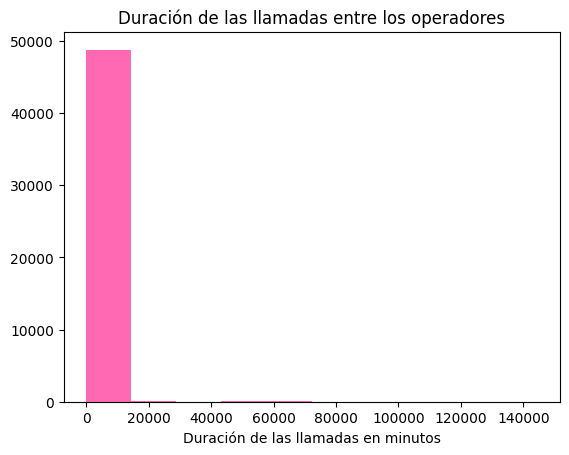

In [17]:
#Traza un histograma para la duración de la llamada
plt.hist(data['call_duration'], bins=10, color="hotpink")
plt.title('Duración de las llamadas entre los operadores')
plt.xlabel('Duración de las llamadas en minutos')

plt.show()

Estos datos nos indican que las llamadas más cortas en realidad son llamadas en 0 (dutando menos de minuto) y la llamada más larga registrada es de 14 4395.

La mayor catidad de nuestras llamadas se encuentran entre el rango de 0 a menos de 2000, siendo valores muy raros las llamadas que pasen de 2000 minutos.

In [18]:
#nueva columna para calcular el tiempo de espera de las llamadas
data["waiting_time"]=data["total_call_duration"]- data["call_duration"]

In [19]:
#describe para concocer los promedios de nuestra caolumna
print(data["waiting_time"].describe())

count    49002.000000
mean       290.276111
std       1132.155291
min          0.000000
25%         17.000000
50%         55.000000
75%        200.000000
max      46474.000000
Name: waiting_time, dtype: float64


Un punto a considerar en la ineficiencia de los operadores es el tiempo de espera. Ahora conocemos que un promedio de tiempo de espera es de 312 minutos.

Al no especificarnos valores a considerar, utilizaremos este valor para considerar un punto de ineficiencia aquellos operadores que superen los 312, si este filtro junto con las llamas pérdidas y y las llamadas salientes crearaán nuestra lista de operadores que no está llegando a las metas de productividad para la empresa.

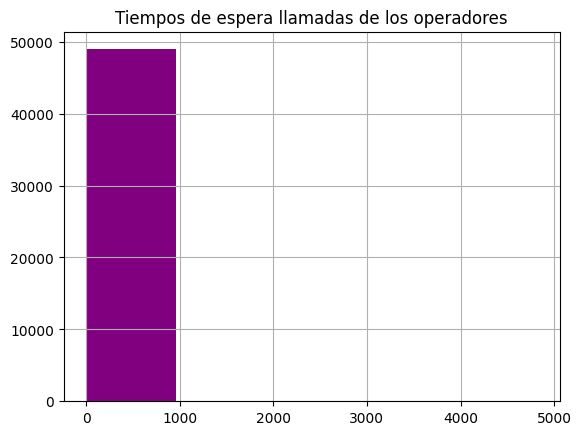

In [20]:
data["calls_count"].hist(bins=5, color="purple") 
plt.title("Tiempos de espera llamadas de los operadores")
plt.show()

In [21]:
#describe para concocer los promedios de nuestra caolumna
print(data["calls_count"].describe())

count    49002.000000
mean        16.462777
std         63.604098
min          1.000000
25%          1.000000
50%          4.000000
75%         12.000000
max       4817.000000
Name: calls_count, dtype: float64


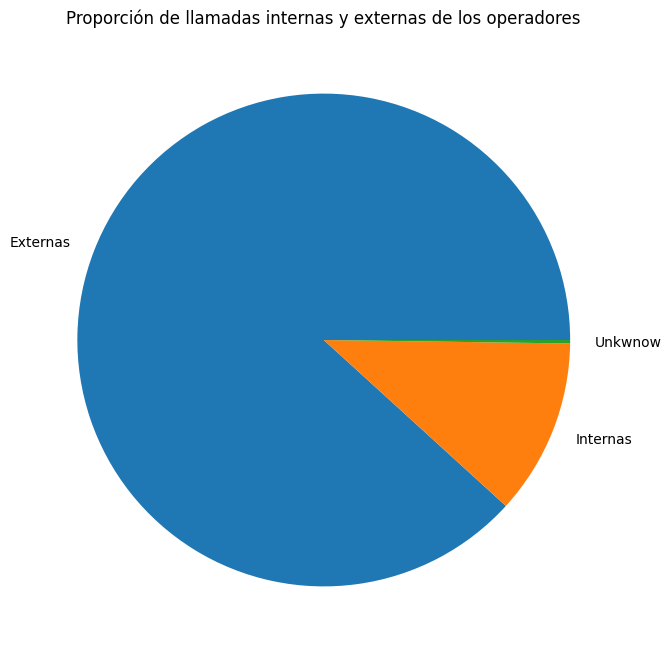

In [22]:
#Traza un gráfico circular que muestre la participación de las llamadas internas y externas

llamadas_int = data['internal'].value_counts(dropna=False)
labels = ['Externas', 'Internas', "Unkwnow"]
plt.figure(figsize=(8, 8))
plt.pie(llamadas_int, labels= labels)
plt.title("Proporción de llamadas internas y externas de los operadores")
plt.show()

Con este gráfico podemos conocer que el mayor porcentaje de llamdas que se realizan son de forma externa, a comparación de las llamadas internas hechas por el operador.

El rango mostrado como Uknow se refiere a los datos ausentes que se nos presentaron en el data

In [23]:
#Agrupar datos por operadores 
data_operadores= data.groupby('operator_id').agg(llamadas_totales=('calls_count', 'sum'),
    llamadas_perdidas=('is_missed_call', 'sum'),
    promedio_tiempo_espera=('total_call_duration', lambda x: (x - data['call_duration']).mean())).reset_index()

Ahora ya tenemos agrupados el rendimiento de cada operador, concentrando su número de llamadas pérdidas, su tiempo promedio de espera y el total de llamadas realiadas, lo que facilitará la evaluación de los mismos.

In [24]:
#Crear una columna con el rango de llamadas perdidas por operador
data_operadores['rango_llamadas_perdidas'] = data_operadores['llamadas_perdidas'] / data_operadores['llamadas_totales']

In [25]:
# Conocer los operadores con peores rangos de llamada
data_operadores.sort_values(by='rango_llamadas_perdidas', ascending=False).head(10)

,operator_id,llamadas_totales,llamadas_perdidas,promedio_tiempo_espera,rango_llamadas_perdidas
688,937716.0,1,1,19.0,1.0
617,932246.0,1,1,60.0,1.0
569,928282.0,2,2,8.0,1.0
253,905480.0,1,1,5.0,1.0
160,899076.0,2,2,23.5,1.0
27,885682.0,3,3,17.0,1.0
687,937710.0,1,1,15.0,1.0
970,954284.0,1,1,3.0,1.0
1011,958458.0,1,1,0.0,1.0
697,937770.0,1,1,37.0,1.0


Si solo consideramos la relacion de las llamadas pérdidas contra el número de llamadas totales estariamos evaluando los operadores "nuevos" ya que los peores ranqueados solo por este motivo son aquellos con muy pocas llamadas realizadas y el mismo nivel de llamadas pérdidas, los 5 mostrados no pueden ser considerados ineficientes ya que no tienen una gran cantidad de llamadas realizadas que nos ayuden a evaluar la productividad del trabajo.

Investigar por qué estos operadores tienen tan pocas llamadas, ya sea ue sean nuevos, pocas llamadas, o si en realidad estan teniendo un bajo desempeño laboral. Es necesario evaluar otros posibles relaciones para saber si quien de los operadores NO esta dando los resultados esperados.

In [26]:
#describe para concocer los rangos de llamadas hechas para evaluar mejor a los operadores
print(data["calls_count"].describe())

count    49002.000000
mean        16.462777
std         63.604098
min          1.000000
25%          1.000000
50%          4.000000
75%         12.000000
max       4817.000000
Name: calls_count, dtype: float64


In [27]:
#Filtrar lo operadores con al menos 12 llamadas(p75) para considerar operadores con tiempo y experiencia
operadores_evaluar = data_operadores[data_operadores['llamadas_totales'] >= 12]
operadores_evaluar

,operator_id,llamadas_totales,llamadas_perdidas,promedio_tiempo_espera,rango_llamadas_perdidas
0,879896.0,930,47,104.914530,0.050538
1,879898.0,7313,89,457.696035,0.012170
2,880020.0,45,6,14.000000,0.133333
3,880022.0,197,29,53.971429,0.147208
4,880026.0,2232,87,121.978022,0.038978
...,...,...,...,...,...
1079,970254.0,12,2,63.000000,0.166667
1084,971102.0,76,0,338.000000,0.000000
1087,972410.0,77,2,374.500000,0.025974
1088,972412.0,61,2,210.000000,0.032787


In [28]:
#Filtrar por llamadas de salida
llamadas_salida = data[data['direction'] == 'out']
llamadas_salida

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,8
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29,26
...,...,...,...,...,...,...,...,...,...,...
53895,168606,2019-11-09 00:00:00+03:00,out,False,957922.0,False,4,551,593,42
53896,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,False,1,0,25,25
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501,22


In [29]:
#Agrupar por operador y llamadas de salida
operadores_llam_salida = llamadas_salida.groupby('operator_id').agg(
    total_llamadas_salida=('calls_count', 'sum'),
    total_llamadas_perdidas=('is_missed_call', 'sum')).reset_index()

In [30]:
#Unir los datas para evaluacion final de los operadores
operadores_final= pd.merge(operadores_llam_salida, data_operadores, on='operator_id', how='left')
operadores_final

,operator_id,total_llamadas_salida,total_llamadas_perdidas,llamadas_totales,llamadas_perdidas,promedio_tiempo_espera,rango_llamadas_perdidas
0,879896.0,872,47,930,47,104.914530,0.050538
1,879898.0,7209,89,7313,89,457.696035,0.012170
2,880020.0,38,6,45,6,14.000000,0.133333
3,880022.0,189,29,197,29,53.971429,0.147208
4,880026.0,2208,87,2232,87,121.978022,0.038978
...,...,...,...,...,...,...,...
877,972408.0,6,1,6,1,22.500000,0.166667
878,972410.0,77,2,77,2,374.500000,0.025974
879,972412.0,60,2,61,2,210.000000,0.032787
880,972460.0,50,3,51,3,88.571429,0.058824


In [31]:
#Nueva columna con el porcentaje de llamadas de salida y el total de llamadas
operadores_final['%_llamadas_salida'] = operadores_final['total_llamadas_salida'] / operadores_final['llamadas_totales']
operadores_final

,operator_id,total_llamadas_salida,total_llamadas_perdidas,llamadas_totales,llamadas_perdidas,promedio_tiempo_espera,rango_llamadas_perdidas,%_llamadas_salida
0,879896.0,872,47,930,47,104.914530,0.050538,0.937634
1,879898.0,7209,89,7313,89,457.696035,0.012170,0.985779
2,880020.0,38,6,45,6,14.000000,0.133333,0.844444
3,880022.0,189,29,197,29,53.971429,0.147208,0.959391
4,880026.0,2208,87,2232,87,121.978022,0.038978,0.989247
...,...,...,...,...,...,...,...,...
877,972408.0,6,1,6,1,22.500000,0.166667,1.000000
878,972410.0,77,2,77,2,374.500000,0.025974,1.000000
879,972412.0,60,2,61,2,210.000000,0.032787,0.983607
880,972460.0,50,3,51,3,88.571429,0.058824,0.980392


In [32]:
#describe para concocer los % de llamadas salida para evaluar mejor a los operadores
print(operadores_final["%_llamadas_salida"].describe())

count    882.000000
mean       0.795047
std        0.273941
min        0.001079
25%        0.661888
50%        0.938453
75%        1.000000
max        1.000000
Name: %_llamadas_salida, dtype: float64


In [33]:
#Filtrar por un porcentaje mayor a 0.79 (media) para evaluar a los operadores
operadores_salidas = operadores_final[operadores_final['%_llamadas_salida'] > 0.79]


In [34]:
#mostrar a los 10 con peor calificacion por % llamadas de salida
operadores_salidas.sort_values(by='%_llamadas_salida').head(10) 

,operator_id,total_llamadas_salida,total_llamadas_perdidas,llamadas_totales,llamadas_perdidas,promedio_tiempo_espera,rango_llamadas_perdidas,%_llamadas_salida
10,882686.0,2884,78,3650,83,288.763393,0.022740,0.790137
560,937788.0,472,27,597,27,133.987654,0.045226,0.790620
581,937988.0,274,23,346,23,132.895522,0.066474,0.791908
211,905870.0,559,22,702,22,181.364865,0.031339,0.796296
550,937752.0,1616,31,2028,31,359.438776,0.015286,0.796844
569,937868.0,250,24,313,25,87.662162,0.079872,0.798722
278,913474.0,8,1,10,1,51.750000,0.100000,0.800000
374,919536.0,8,3,10,3,15.000000,0.300000,0.800000
97,894232.0,16,7,20,8,23.846154,0.400000,0.800000
559,937786.0,12,2,15,2,37.142857,0.133333,0.800000


En esta última tabla podemos observar a los operadores que han tenido un bajo % de llamadas salida, lo que nos indica de estos operadores estan teniendo fallas con sus llamadas.

Además podemos observar que algunos operadors también tienen altas tasas de llamadas perdidas, lo que podría indicarnos ya una ineficiencia evidente.

# Prueba las hipótesis

Ya habiendo analiando el trabajo y los números de los operadores, vamos a investigar si estas anomalias entre los usuarios estan creando que su productividad se vea afectada.

Para esto realizaremos difernetes pruebas que nos ayuden a estimar si estamos teniendo problemas entre los grupos de operadores dependiendo sus diferentes cifras ya analizadas previamente.

### Hipotesis a demostrar: 

**Hipotesis 1**

El tiempo de espera promedio es significatuvamente diferente en los operadores con muchas llamadas perdidas y con aquellos que no tienen tantas llamadas pérdidas 

**Hipótesis 2**

La tasa promedio de llamadas perdidas es significativamente diferente en función de la actividad de llamadas salientes hechas por los operadores 

In [35]:
# Preparación de los datos para la prueba de hipótesis
# División de los operadores en dos grupos: tasa alta de llamadas perdidas (por encima de la mediana) y tasa baja de llamadas perdidas (por debajo o igual a la mediana)
media_llamadas_perdidas = data_operadores['rango_llamadas_perdidas'].median()
operadores_llamadas_perdidas_altas = data_operadores[data_operadores['rango_llamadas_perdidas'] > media_llamadas_perdidas]
operadores_llamadas_perdidas_bajas = data_operadores[data_operadores['rango_llamadas_perdidas'] <= media_llamadas_perdidas]

In [36]:
# Prueba de hipótesis 1
#separan los operadores por grupos de tiempo de espera alto o bajo.
tiempo_espera_alto = operadores_llamadas_perdidas_altas['promedio_tiempo_espera'].dropna()
tiempo_espera_bajo = operadores_llamadas_perdidas_bajas['promedio_tiempo_espera'].dropna()

In [37]:
#Realizar una prueba t independiente para los tiempos de espera promedio entre los dos grupos
t_stat_tiempo_espera, p_val_tiempo_espera = stats.ttest_ind(tiempo_espera_alto, tiempo_espera_bajo, equal_var=False)

In [38]:
# Prueba de hipótesis 2
#Dividir los datos en dos grupos: porcentaje alto de llamadas salientes y porcentaje bajo de llamadas salientes
media_llamadas_salida = operadores_final['%_llamadas_salida'].median()
salidas_altas = operadores_final[operadores_final['%_llamadas_salida'] > media_llamadas_salida]
salidas_bajas = operadores_final[operadores_final['%_llamadas_salida'] <= media_llamadas_salida]

In [39]:
#Se hace de una prueba t independiente para la tasa de llamadas perdidas entre grupos de actividad de llamadas salientes alta y baja
salidas_altas = salidas_altas['rango_llamadas_perdidas'].dropna()
salidas_bajas = salidas_bajas['rango_llamadas_perdidas'].dropna()

In [40]:
# Definir una función para validar los supuestos de las pruebas t: normalidad y varianzas iguales

def validar_t_test(grupo1, grupo2):
    # Shapiro-Wilk Test
    shapiro_grupo1 = stats.shapiro(grupo1)
    shapiro_grupo2 = stats.shapiro(grupo2)
    
    # Levene's Test
    levene_test = stats.levene(grupo1, grupo2)
    
    return {
        "Shapiro_Grupo1": shapiro_grupo1,
        "Shapiro_Grupo2": shapiro_grupo2,
        "Levene_Test": levene_test
    }

In [41]:
# Aplicación de la función para ambas pruebas:
# Hipotesis 1
tiempo_espera_hip = validar_t_test(tiempo_espera_alto, tiempo_espera_bajo)

#Hipotesis 2
llamadas_perdidas_hip = validar_t_test(salidas_altas, salidas_bajas)

In [42]:
# Resultado de las pruebas
(tiempo_espera_hip, llamadas_perdidas_hip)

({'Shapiro_Grupo1': ShapiroResult(statistic=0.8214612603187561, pvalue=3.565985768622787e-24),
  'Shapiro_Grupo2': ShapiroResult(statistic=0.564888596534729, pvalue=1.1470820554321878e-34),
  'Levene_Test': LeveneResult(statistic=137.63821338378528, pvalue=5.1200308314092784e-30)},
 {'Shapiro_Grupo1': ShapiroResult(statistic=0.6068916916847229, pvalue=1.9703480202833394e-30),
  'Shapiro_Grupo2': ShapiroResult(statistic=0.8163653612136841, pvalue=4.582652790093819e-22),
  'Levene_Test': LeveneResult(statistic=32.22028061280053, pvalue=1.868604784026537e-08)})

In [43]:
# Función para realizar la prueba

def prueba_hipotesis(grupo1, grupo2, suposicion):
    # Verificar si se cumplen los supuestos de normalidad y varianzas iguales
    normalidad_grupo1 = suposicion['Shapiro_Grupo1'].pvalue > 0.05
    normalidad_grupo2 = suposicion['Shapiro_Grupo2'].pvalue > 0.05
    if normalidad_grupo1 and normalidad_grupo2:
        varianzas_iguales = suposicion['Levene_Test'].pvalue > 0.05

        if varianzas_iguales:
           # Realizar una prueba t independiente con varianzas iguales
            resultados_prueba = stats.ttest_ind(grupo1, grupo2, equal_var=True)
            tipo_prueba = "T-Test con Varianzas Iguales"
        else:
            # Realizar una prueba t independiente sin asumir varianzas iguales
            resultados_prueba = stats.ttest_ind(grupo1, grupo2, equal_var=False)
            tipo_prueba = "T-Test sin Varianzas Iguales"
    else:
        # Si se viola la normalidad, realice la prueba U de Mann-Whitney (prueba no paramétrica)
        resultados_prueba = stats.mannwhitneyu(grupo1, grupo2, alternative='two-sided')
        tipo_prueba = "Mann-Whitney U Test"

    return resultados_prueba, tipo_prueba

In [44]:
# Aplicar prueba
# Hipotesis 1 
prueba_tiempo_espera = prueba_hipotesis(tiempo_espera_alto,tiempo_espera_bajo, tiempo_espera_hip)

# 2. Para la tasa de llamadas perdidas (actividad de llamadas salientes alta vs baja)
prueba_llamadas_perdida= prueba_hipotesis(salidas_altas, salidas_bajas, llamadas_perdidas_hip)

In [45]:
# Visualización del tipo de prueba y los resultados para cada caso
print("Tiempo de espera\t", prueba_tiempo_espera)
print("LLamadas pérdidas\t", prueba_llamadas_perdida)

Tiempo de espera	 (MannwhitneyuResult(statistic=87250.5, pvalue=1.8839178246420611e-32), 'Mann-Whitney U Test')
LLamadas pérdidas	 (MannwhitneyuResult(statistic=83057.0, pvalue=0.00017711360000827558), 'Mann-Whitney U Test')


**Hipótesis 1**

Para comprobar nuestros hipótesis realicé una prueba t independiente que compara los tiempos de espera promedio entre los dos grupos para conocer si existen una diferencias significativas entre los resultados de ambos grupos que nos ayude a definir la ineficiencia de los operadores.

**Resultado:** El valor P salio en 1.8839 lo que es significativamente superior, mostrando una gran dierencia en la eficiencia de ambos grupos siendo evaluados por este parámetro.


**Hipótesis 2**

Para comprobar nuestros hipótesis realicé una prueba t independiente para conocr si las tasas de llamadas perdidas difieren significativamente entre operadores con alta y baja actividad de llamadas salientes ,entre ambos grupos ayudando a definir si estos parámetros ayudan a medir la ineficiencia de algunos operadores.

**Resultado:** El valor P salio en 0.00017 lo que no representa diferencia significativa entre ambos grupos por este párametro, no encontrando un valor que nos ayude a medir la eficiencia entre los grupos de operadores.

# Conclusiones

-	Existen 8 172 de filas de información que no han podido ser evaluada, esto por la ausencia del id del operador, esto puede afectar nuestras métricas, es importante reportar este dato para próximas tareas, ya que puede deberse a una falla en la captación de información de la empresa.


-	Del data original 4 900 filas están duplicadas, (siendo el 9.09% de data original), nuevamente es importante reportar estas fallas.


-	La duración promedio de las llamadas es de 866 minutos, teniendo un registro de 144 395 minutos en un usuario.


-	El tiempo de espera promedio entre los operadores va de 290 minutos, el registro máximo fue e 46 474, siendo un rango normal entre 0 a 1000 minutos entre los operadores.


-	El conteo de llamadas promedio por operadore es de 16 llamadas.


-	Observamos que >75% de las llamadas por los operadores son externas y el resto son de forma interna.


-	Se agrupó toda la información en relación con las llamadas, conteos, llamadas perdidas totales, relación de llamadas perdidas al total, etc. por operador para así evaluar su eficiencia para la empresa.


-	Se tenemos 2 parámetros a evaluar para comprobar las hipótesis:
o	El tiempo de espera 
o	La tasa de llamadas pérdidas en relación a la cantidad de llamadas salientes


-	Al comprobar ambas teorías con la ayuda de un t test podemos concluir que el parámetros de tiempo de espera Si ayuda a evaluar la eficiencia de los operadores. Operadores con altos niveles de tiempo de espera NO ESTAN SIENDO EFICIENTES.


-	E n cambio al evaluar la relación de las llamadas perdidas con la cantidad de llamadas NO indico ser un buen parámetro, al no mostrar diferencias significativas.

**En conclusión podemos empezar a evaluar a los operadores con mayor tiempo de espera como ineficientes.

Se recomienda evaluar la relación de llamadas perdidas totales con el total de llamadas, para saber si estos operadores también están siendo ineficientes y tener parámetros más amplios para criterio de los encargados y hagan tomas de decisión más acertadas y completas con el trabajo de los operadores.**


# Bibliografia 

- Prueba T vs prueba Z. (2025, 16 enero). Datacamp. Recuperado 24 de febrero de 2025, de https://www.datacamp.com/es/tutorial/t-test-vs-z-test

Leer sobre la pueba Z y T, me ayudó a utilizar la prueba correcta según los datos que tenía y aquello que debía investigar con la prueba.

- Prueba U de Mann-Whitney: Qué es y cómo funciona. Marytere Narvaez. QuestionPro. Recuperado 24 de febrero de 2025, de https://www.questionpro.com/blog/es/prueba-u-de-mann-whitney/

Este artíiculo me ayudó a repasar sobre la funcionalidad de la prueba y como interpretar los resultados para su uso, logrando la interpretación correcta de la prueba en mis datos.

- Diagrama de sectores (pie chart) en matplotlib. Python Charts. Recuperado 24 de febrero de 2025, de https://python-charts.com/es/parte-todo/pie-chart-matplotlib/

Leer los códigos para crear una gráfica de pie me ayudó a desarrollar la forma correcta de la gráfica solicitada y visualizar la información deseada de nuestros datas.

- Prueba de Levene.Data Tab. Recuperado 24 de febrero de 2025, de https://datatab.es/tutorial/levene-test

Este artíiculo me ayudó a repasar sobre la funcionalidad de la prueba y como interpretar los resultados para su uso, ayudandome a verificar su uso en nuestro análisis.

- pandas.DataFrame.merge.  Pandas. Recuperado 24 de febrero de 2025, de https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

Leer la información sobre MERGE me ayudo a desarollar de forma correcta la unión de las tablas deseadas para tener toda la informaicón necesaria de los operadores para su evaluación de eficiencia.